In [100]:
from tensorflow import keras

In [101]:
#create a model

model = keras.Sequential([
    keras.layers.Convolution2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(64,(3,3),activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(64,(3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(64,(3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation = "relu"),
    keras.layers.Dense(4,activation = 'softmax'),
])
model.summary()

AttributeError: 'float' object has no attribute 'lower'

In [86]:
model.compile(optimizer = 'nadam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [87]:
#model.fit(___) #this is generally used when we have smaller data that can fit into memory
#if we have large data we want to give data in batches, thats where we use data generators
from keras.preprocessing.image import ImageDataGenerator

In [88]:
train_gen = ImageDataGenerator(rescale = 1.0/255, validation_split = 0.2)
train_generators = train_gen.flow_from_directory(
   './Images_dataset',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)
val_generators = train_gen.flow_from_directory(
   './Images_dataset',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 648 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


In [89]:
train_generators.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [90]:
x,y = train_generators.next()   #gives the next batch
print(x.shape)
print(y.shape)

(32, 150, 150, 3)
(32, 4)


In [91]:
xx,yy = val_generators.next()
print(xx.shape)
print(yy.shape)

(32, 150, 150, 3)
(32, 4)


In [92]:
#to see each and every one of the batches
# for x,y in train_generators:
#     print(x.shape)
#     print(y.shape)

In [97]:
#train our model
his = model.fit_generator(
     train_generators,
     validation_data = val_generators,
     validation_steps = 1,
     epochs = 5,
     steps_per_epoch = 7
)

Epoch 1/5
7/7 [==============================] - 5s 651ms/step - loss: 0.1216 - accuracy: 0.9650 - val_loss: 1.5996 - val_accuracy: 0.5625
Epoch 2/5
7/7 [==============================] - 5s 684ms/step - loss: 0.0763 - accuracy: 0.9821 - val_loss: 1.5229 - val_accuracy: 0.5625
Epoch 3/5
7/7 [==============================] - 5s 712ms/step - loss: 0.0508 - accuracy: 0.9955 - val_loss: 2.3358 - val_accuracy: 0.5312
Epoch 4/5
7/7 [==============================] - 4s 627ms/step - loss: 0.0542 - accuracy: 0.9850 - val_loss: 2.0637 - val_accuracy: 0.5938
Epoch 5/5
7/7 [==============================] - 5s 693ms/step - loss: 0.6407 - accuracy: 0.8125 - val_loss: 1.0969 - val_accuracy: 0.6875


In [94]:
his.history

{'loss': [1.4115992784500122,
  1.3732653856277466,
  1.3724018335342407,
  1.3690379858016968,
  1.2929935455322266,
  1.3084772825241089,
  1.3343275785446167,
  1.176869511604309,
  1.154144525527954,
  1.0345783233642578,
  0.9397801160812378,
  1.0323296785354614,
  1.348447561264038,
  1.0326828956604004,
  1.0571261644363403,
  0.9711502194404602,
  0.8673602938652039,
  0.7874687910079956,
  0.8381982445716858,
  0.7990683317184448],
 'accuracy': [0.2544642984867096,
  0.27000001072883606,
  0.2678571343421936,
  0.3700000047683716,
  0.4241071343421936,
  0.3839285671710968,
  0.3705357015132904,
  0.5,
  0.5089285969734192,
  0.574999988079071,
  0.5892857313156128,
  0.5535714030265808,
  0.4866071343421936,
  0.5892857313156128,
  0.5758928656578064,
  0.6071428656578064,
  0.6116071343421936,
  0.6830357313156128,
  0.6650000214576721,
  0.6741071343421936],
 'val_loss': [1.389643907546997,
  1.3572734594345093,
  1.3860609531402588,
  1.2963640689849854,
  1.2394406795501

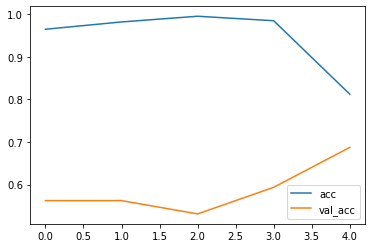

In [99]:
import matplotlib.pyplot as plt
plt.plot(his.history['accuracy'],label = "acc")
plt.plot(his.history['val_accuracy'],label = 'val_acc')
plt.legend()
plt.show()